In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
path = "/content/drive/My Drive/ML_Term_Project/"
data_df = pd.read_csv(path + "dataset_3.csv")

In [5]:
data_df.head()

,Unnamed: 0,index,text,class,norm
0,0,0,TIL I'm the district attorney.,none,2
1,1,1,Aw there's nothing to cry about Lynn xx,none,2
2,2,2,"Call me sexist, but shouldn't everyone on the ...",sexism,1
3,3,3,"""We fought so hard in this entire comp it woul...",none,2
4,4,4,This season is going to go on forever,none,2


In [0]:
data_df = data_df.drop(["Unnamed: 0", "index"], axis=1)

In [7]:
data_df.head()

,text,class,norm
0,TIL I'm the district attorney.,none,2
1,Aw there's nothing to cry about Lynn xx,none,2
2,"Call me sexist, but shouldn't everyone on the ...",sexism,1
3,"""We fought so hard in this entire comp it woul...",none,2
4,This season is going to go on forever,none,2


In [0]:
"""
@:param range_list represents x-axis values. If your x-axis values are in (1, 20) range,
plot's x-axis's in (1, 20) range.
@:param value_list represents accuracy values
@:param title_str is your plot's title. It must be in string type. 
@:param x_label_str is your x-axis title. For example, 'C values'
@:param y_label_str is your y-axis title. For example, 'Accuracies'
"""

def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [0]:
def feature_extract(train_text, stop_word=True, n_gram=(1, 1)):
    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    return train_feature_set

In [0]:
X = data_df['text'].values.astype('U')
y = data_df["norm"].values.astype('int32')
X = feature_extract(X)

In [11]:
c_acc_list = []
for c in range(1, 20):
    clf = svm.LinearSVC(C=c, multi_class="ovr")
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

Accuracy C: 1 :  0.813804499604108
Accuracy C: 2 :  0.8041634125228836
Accuracy C: 3 :  0.7974199490470233
Accuracy C: 4 :  0.7916236865274823
Accuracy C: 5 :  0.7883113715181641
Accuracy C: 6 :  0.7849989864003913
Accuracy C: 7 :  0.7822188308983894
Accuracy C: 8 :  0.7787291060309595
Accuracy C: 9 :  0.7765997682430792
Accuracy C: 10 :  0.7742340240841311
Accuracy C: 11 :  0.7721046862962508
Accuracy C: 12 :  0.7705671345517209
Accuracy C: 13 :  0.7691476459829925
Accuracy C: 14 :  0.7677874340295553


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 15 :  0.766722800086254


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 16 :  0.7650667650952904


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 17 :  0.7643571258700195


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 18 :  0.7634110452816067


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy C: 19 :  0.7627606126046079


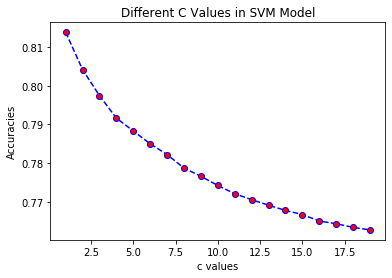

In [12]:
draw_plot(range(1, 20), c_acc_list, "Different C Values in SVM Model", "c values", "Accuracies")

In [13]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)
print(c)
c += 1
print(c)


0
1


In [14]:
acc_with_stop = []
acc_wout_stop = []
for i in range(1, 6):
    for stop_word in [True, False]:
        X = data_df['text'].values.astype('U')
        y = data_df["norm"].values.astype('int32')
        X = feature_extract(X, stop_word=stop_word, n_gram=(i, i))

        clf = svm.LinearSVC(C=c, multi_class="ovr")
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            acc_wout_stop.append(scores.mean())
            print("Accuracy without stopwords", (i, i), ":" , scores.mean())
        else:
            acc_with_stop.append(scores.mean())
            print("Accuracy with stopwords", (i, i), ":" , scores.mean())

Accuracy without stopwords (1, 1) : 0.813804499604108
Accuracy with stopwords (1, 1) : 0.8188309010827283
Accuracy without stopwords (2, 2) : 0.739870475521427
Accuracy with stopwords (2, 2) : 0.7752992882576868
Accuracy without stopwords (3, 3) : 0.6949191292660075
Accuracy with stopwords (3, 3) : 0.7392786897266881
Accuracy without stopwords (4, 4) : 0.6893003817465422
Accuracy with stopwords (4, 4) : 0.7124265049644172
Accuracy without stopwords (5, 5) : 0.6873484886431068
Accuracy with stopwords (5, 5) : 0.6905421454041843


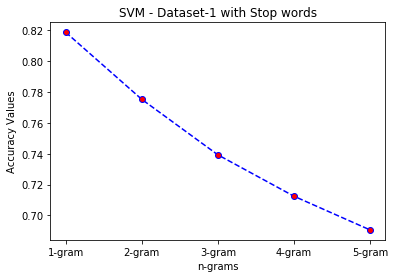

In [15]:
n_grams = ["1-gram", "2-gram", "3-gram", "4-gram", "5-gram"]
draw_plot(n_grams, acc_with_stop, "SVM - Dataset-1 with Stop words", "n-grams", "Accuracy Values")

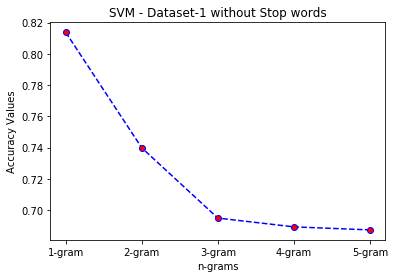

In [16]:
draw_plot(n_grams, acc_wout_stop, "SVM - Dataset-1 without Stop words", "n-grams", "Accuracy Values")